In [1]:
import wbgapi as wb
import pandas as pd
from feature_engineering import engineering
from model import Model, regression
from sklearn.model_selection import train_test_split
from trained_model import load_model

In [2]:
df = pd.read_csv("./data/happiness/90complete.csv", index_col=0)
y = df['Happiness score']
X = df.drop(labels=["ISO_A3", "Happiness score"], axis=1)

## Feature Engineering

In [51]:
eng_obj = engineering(X_tr=X, y_tr=y, pca_comp=45, pca_desired_var=0.95)

In [52]:
eng_obj.get_pca_features()

In [ ]:
eng_obj.get

Index(['CC.EST', 'CC.PER.RNK', 'CC.PER.RNK.LOWER', 'CC.PER.RNK.UPPER',
       'EG.CFT.ACCS.ZS', 'GE.EST', 'GE.PER.RNK', 'GE.PER.RNK.LOWER',
       'GE.PER.RNK.UPPER', 'IT.NET.BBND.P2', 'IT.NET.USER.ZS',
       'NV.SRV.EMPL.KD', 'NY.GDP.PCAP.CD', 'NY.GDP.PCAP.KD',
       'NY.GDP.PCAP.PP.CD', 'NY.GDP.PCAP.PP.KD', 'NY.GNP.PCAP.CD',
       'NY.GNP.PCAP.PP.CD', 'PA.NUS.PPPC.RF', 'RL.EST', 'RL.PER.RNK',
       'RL.PER.RNK.LOWER', 'RL.PER.RNK.UPPER', 'RQ.EST', 'RQ.PER.RNK',
       'RQ.PER.RNK.LOWER', 'RQ.PER.RNK.UPPER', 'SH.DYN.0509', 'SH.DYN.1014',
       'SH.DYN.MORT', 'SH.DYN.MORT.FE', 'SH.DYN.MORT.MA', 'SH.DYN.NMRT',
       'SL.AGR.EMPL.FE.ZS', 'SL.AGR.EMPL.ZS', 'SL.GDP.PCAP.EM.KD',
       'SL.SRV.EMPL.ZS', 'SP.DYN.IMRT.FE.IN', 'SP.DYN.IMRT.IN',
       'SP.DYN.IMRT.MA.IN', 'SP.DYN.LE00.FE.IN', 'SP.DYN.LE00.IN',
       'SP.DYN.LE00.MA.IN', 'SP.DYN.TO65.FE.ZS', 'SP.POP.0509.MA.5Y', 'VA.EST',
       'VA.PER.RNK', 'VA.PER.RNK.LOWER', 'VA.PER.RNK.UPPER', 'VA.STD.ERR'],
      dtype='object')

## Regression Models

In [3]:
train_mse_scores = {}
train_r2_scores = {}

### No feature selection

In [3]:
regr = regression(est_type='xgb', tuning_strategy='bayesian', cv_fold=10, num_trials=450, og_df=df)

In [4]:
regr.make_full_model(X_train=X, y_train=y)

/Users/oscarescobar/Desktop/ACME/Projects/Vol3/Fall/model.py:963: UserWarning: NOTE: Please check the hidden attributes for the model choice: reg, and estimator: xgb before hypertuning should you want to have different hyperparameters than the ones set as default.
  warnings.warn(message=f"NOTE: Please check the hidden attributes for the model choice: {self.model_choice}, and estimator: {self.est_type} before hypertuning " +\


Now continuing.
Making XGBRegressor using Bayesian optimization...
Training and tuning...


  0%|          | 0/450 [00:00<?, ?it/s]

Training completed.
The number of best trials: 1
Here is a list of the best trials of(MSE, R^2):
	*Trial 444 (list index 0):
		Params: {'n_estimators': 82, 'eta': 0.009889487052942033, 'alpha': 0.6516170370203156, 'lambda': 2.2225721736377917, 'gamma': 1.3377585623629784, 'max_depth': 15}
		Values: [0.5968175184179769, 0.44327781851342296]


In [5]:
regr.best_params

{'n_estimators': 82,
 'eta': 0.009889487052942033,
 'alpha': 0.6516170370203156,
 'lambda': 2.2225721736377917,
 'gamma': 1.3377585623629784,
 'max_depth': 15}

In [8]:
regr.t_r2

0.6442220700549166

In [9]:
regr.t_MSE

0.4179605604901318

In [10]:
regr.get_happiness_predictions(X=X, y_true=y)

In [14]:
save = True

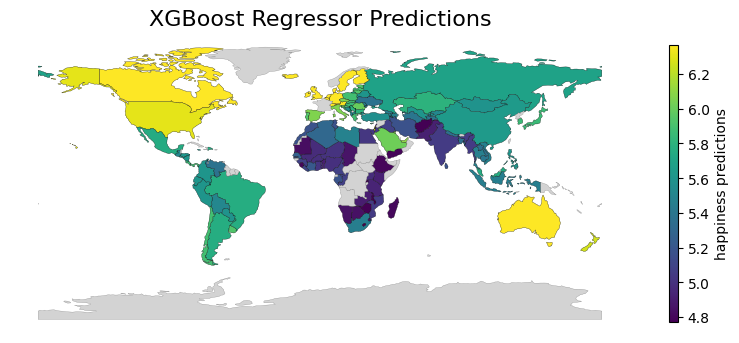

In [15]:
regr.get_worldplot(fig_title='XGBoost Regressor Predictions', save_fig=save, path_to_fig="./images/xgb_reg_happiness_pred.pdf")

In [13]:
regr.save_model(path_to_model="./saved_models/xgb_reg_new.sav")

Model saved to ./saved_models/xgb_reg_new.sav


# Trained Model

In [6]:
trained = load_model(og_df=df)

In [7]:
trained.model.n_estimators

100

In [12]:
trained.model.oob_score_

0.7068773952948721

In [ ]:
trained.model.

100

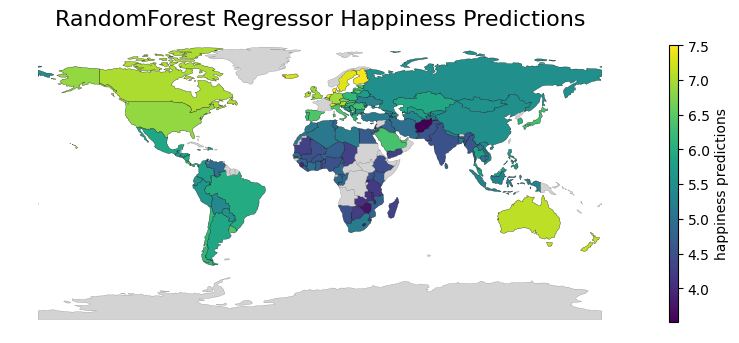

In [6]:
trained.get_worldplot(fig_title="RandomForest Regressor Happiness Predictions")